# Cleaning & Restructuring Data

Most times the journey to having a clean data set ready for analysis is most of the work in data science. In the case of our census data we have a situation where there is a lot of `head` and `tail` data that has nothing to do with our end case.  Also our States and population figures are misformatted - so we need to "clean" them in order to do further analysis.

In [26]:
import pandas as pd
import numpy as np

Notice that at a glance that our header row is not the first row of the CSV so we need to tell pandas what row the header is contained in (it's row 4).

In [27]:
pd.read_csv("NST-EST2014-01.csv").head()

,table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Table 1. Annual Estimates of the Resident Popu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Geographic Area,"April 1, 2010",NaN,Population Estimate (as of July 1),NaN,NaN,NaN,NaN
2,NaN,Census,Estimates Base,2010,2011,2012,2013,2014
3,United States,"308,745,538","308,758,105","309,347,057","311,721,632","314,112,078","316,497,531","318,857,056"
4,Northeast,"55,317,240","55,318,348","55,381,690","55,635,670","55,832,038","56,028,220","56,152,333"


In [28]:
!head NST-EST2014-01.csv

In [29]:
pd.read_csv("NST-EST2014-01.csv", header=3).head()

,Unnamed: 0,Census,Estimates Base,2010,2011,2012,2013,2014
0,United States,"308,745,538","308,758,105","309,347,057","311,721,632","314,112,078","316,497,531","318,857,056"
1,Northeast,"55,317,240","55,318,348","55,381,690","55,635,670","55,832,038","56,028,220","56,152,333"
2,Midwest,"66,927,001","66,929,898","66,972,390","67,149,657","67,331,458","67,567,871","67,745,108"
3,South,"114,555,744","114,562,951","114,871,231","116,089,908","117,346,322","118,522,802","119,771,934"
4,West,"71,945,553","71,946,908","72,121,746","72,846,397","73,602,260","74,378,638","75,187,681"


Adding the `header=3` kwarg to our `read_csv` call should take care of that cleanup.  For the most part. Notice that our states have a mislabeled (missing) column header.

In [30]:
pop_data = pd.read_csv("NST-EST2014-01.csv", header=3)

To fix our mislabeled state column we can just pop the column named `Unnamed: 0` and put it back on the DataFrame as a column labeled `State`.

In [31]:
#pop_data["State"] = pop_data.pop("Unnamed: 0")

In [32]:
pop_data = pop_data.rename(columns={"Unnamed: 0": "State"})

In [33]:
pop_data.head()

,State,Census,Estimates Base,2010,2011,2012,2013,2014
0,United States,"308,745,538","308,758,105","309,347,057","311,721,632","314,112,078","316,497,531","318,857,056"
1,Northeast,"55,317,240","55,318,348","55,381,690","55,635,670","55,832,038","56,028,220","56,152,333"
2,Midwest,"66,927,001","66,929,898","66,972,390","67,149,657","67,331,458","67,567,871","67,745,108"
3,South,"114,555,744","114,562,951","114,871,231","116,089,908","117,346,322","118,522,802","119,771,934"
4,West,"71,945,553","71,946,908","72,121,746","72,846,397","73,602,260","74,378,638","75,187,681"


As if we'd like to set it as our index it's as easy as pie~

In [34]:
pop_data.index = pop_data.pop("State")

In [35]:
pop_data.head(10)

,Census,Estimates Base,2010,2011,2012,2013,2014
State,,,,,,,
United States,"308,745,538","308,758,105","309,347,057","311,721,632","314,112,078","316,497,531","318,857,056"
Northeast,"55,317,240","55,318,348","55,381,690","55,635,670","55,832,038","56,028,220","56,152,333"
Midwest,"66,927,001","66,929,898","66,972,390","67,149,657","67,331,458","67,567,871","67,745,108"
South,"114,555,744","114,562,951","114,871,231","116,089,908","117,346,322","118,522,802","119,771,934"
West,"71,945,553","71,946,908","72,121,746","72,846,397","73,602,260","74,378,638","75,187,681"
.Alabama,"4,779,736","4,780,127","4,785,822","4,801,695","4,817,484","4,833,996","4,849,377"
.Alaska,"710,231","710,249","713,856","722,572","731,081","737,259","736,732"
.Arizona,"6,392,017","6,392,310","6,411,999","6,472,867","6,556,236","6,634,997","6,731,484"
.Arkansas,"2,915,918","2,915,958","2,922,297","2,938,430","2,949,300","2,958,765","2,966,369"


In [37]:
pop_data.tail(10)

,Census,Estimates Base,2010,2011,2012,2013,2014
State,,,,,,,
.West Virginia,"1,852,994","1,853,033","1,854,176","1,854,982","1,856,313","1,853,595","1,850,326"
.Wisconsin,"5,686,986","5,687,289","5,689,268","5,708,785","5,724,888","5,742,953","5,757,564"
.Wyoming,"563,626","563,767","564,358","567,631","576,893","583,223","584,153"
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Puerto Rico,"3,725,789","3,726,157","3,721,527","3,686,771","3,642,281","3,595,839","3,548,397"
"Note: The estimates are based on the 2010 Census and reflect changes to the April 1, 2010 population due to the Count Question Resolution program and geographic program revisions. See Geographic Terms and Definitions at http://www.census.gov/popest/about/geo/terms.html for a list of the states that are included in each region. All geographic boundaries for the 2014 population estimates series are defined as of January 1, 2014. For population estimates methodology statements, see http://www.census.gov/popest/methodology/index.html.",NaN,NaN,NaN,NaN,NaN,NaN,NaN
Suggested Citation:,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Table 1. Annual Estimates of the Resident Population for the United States, Regions, States, and Puerto Rico: April 1, 2010 to July 1, 2014 (NST-EST2014-01)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Source: U.S. Census Bureau, Population Division",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
pop_data = pop_data.iloc[0:-5]

In [39]:
pop_data.tail()

,Census,Estimates Base,2010,2011,2012,2013,2014
State,,,,,,,
.West Virginia,"1,852,994","1,853,033","1,854,176","1,854,982","1,856,313","1,853,595","1,850,326"
.Wisconsin,"5,686,986","5,687,289","5,689,268","5,708,785","5,724,888","5,742,953","5,757,564"
.Wyoming,"563,626","563,767","564,358","567,631","576,893","583,223","584,153"
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Puerto Rico,"3,725,789","3,726,157","3,721,527","3,686,771","3,642,281","3,595,839","3,548,397"


WOOPS! There are is an empty row somehow.  Let's get rid of that one.

In [40]:
pop_data = pop_data.dropna(how="all")

In [41]:
pop_data.tail()

,Census,Estimates Base,2010,2011,2012,2013,2014
State,,,,,,,
.Washington,"6,724,540","6,724,543","6,741,911","6,822,112","6,896,325","6,973,742","7,061,530"
.West Virginia,"1,852,994","1,853,033","1,854,176","1,854,982","1,856,313","1,853,595","1,850,326"
.Wisconsin,"5,686,986","5,687,289","5,689,268","5,708,785","5,724,888","5,742,953","5,757,564"
.Wyoming,"563,626","563,767","564,358","567,631","576,893","583,223","584,153"
Puerto Rico,"3,725,789","3,726,157","3,721,527","3,686,771","3,642,281","3,595,839","3,548,397"


Say for some random reason we only want to count states not territories, so let's drop Puerto Rico.  Since we're dropping by cell value by row lets make sure we specificy `axis=0`.

In [42]:
pop_data.drop("Puerto Rico", axis=0).tail()

,Census,Estimates Base,2010,2011,2012,2013,2014
State,,,,,,,
.Virginia,"8,001,024","8,001,023","8,025,376","8,110,188","8,193,422","8,270,345","8,326,289"
.Washington,"6,724,540","6,724,543","6,741,911","6,822,112","6,896,325","6,973,742","7,061,530"
.West Virginia,"1,852,994","1,853,033","1,854,176","1,854,982","1,856,313","1,853,595","1,850,326"
.Wisconsin,"5,686,986","5,687,289","5,689,268","5,708,785","5,724,888","5,742,953","5,757,564"
.Wyoming,"563,626","563,767","564,358","567,631","576,893","583,223","584,153"


and if we want to drop an entire column we can drop it by name as long as we specify `axis=1`.

In [43]:
pop_data.drop("Census", axis=1).tail()

,Estimates Base,2010,2011,2012,2013,2014
State,,,,,,
.Washington,"6,724,543","6,741,911","6,822,112","6,896,325","6,973,742","7,061,530"
.West Virginia,"1,853,033","1,854,176","1,854,982","1,856,313","1,853,595","1,850,326"
.Wisconsin,"5,687,289","5,689,268","5,708,785","5,724,888","5,742,953","5,757,564"
.Wyoming,"563,767","564,358","567,631","576,893","583,223","584,153"
Puerto Rico,"3,726,157","3,721,527","3,686,771","3,642,281","3,595,839","3,548,397"


Fortunately we don't really want to remove those pieces of data from our data right now - notice that they are left intact because we didn't reassign the DataFrame returned from the drop to any variable.  It just printed to Ipython notebook and was done.

In [44]:
pop_data.tail()

,Census,Estimates Base,2010,2011,2012,2013,2014
State,,,,,,,
.Washington,"6,724,540","6,724,543","6,741,911","6,822,112","6,896,325","6,973,742","7,061,530"
.West Virginia,"1,852,994","1,853,033","1,854,176","1,854,982","1,856,313","1,853,595","1,850,326"
.Wisconsin,"5,686,986","5,687,289","5,689,268","5,708,785","5,724,888","5,742,953","5,757,564"
.Wyoming,"563,626","563,767","564,358","567,631","576,893","583,223","584,153"
Puerto Rico,"3,725,789","3,726,157","3,721,527","3,686,771","3,642,281","3,595,839","3,548,397"


Now we need to clean up our row indexes. Those state names are not clean at all!

In [45]:
pop_data.index

Index(['United States', 'Northeast', 'Midwest', 'South', 'West', '.Alabama',
       '.Alaska', '.Arizona', '.Arkansas', '.California', '.Colorado',
       '.Connecticut', '.Delaware', '.District of Columbia', '.Florida',
       '.Georgia', '.Hawaii', '.Idaho', '.Illinois', '.Indiana', '.Iowa',
       '.Kansas', '.Kentucky', '.Louisiana', '.Maine', '.Maryland',
       '.Massachusetts', '.Michigan', '.Minnesota', '.Mississippi',
       '.Missouri', '.Montana', '.Nebraska', '.Nevada', '.New Hampshire',
       '.New Jersey', '.New Mexico', '.New York', '.North Carolina',
       '.North Dakota', '.Ohio', '.Oklahoma', '.Oregon', '.Pennsylvania',
       '.Rhode Island', '.South Carolina', '.South Dakota', '.Tennessee',
       '.Texas', '.Utah', '.Vermont', '.Virginia', '.Washington',
       '.West Virginia', '.Wisconsin', '.Wyoming', 'Puerto Rico'],
      dtype='object', name='State')

The best way to clean them up is to just use regular expressions to find any string that starts with a `.` and replace that `.` with an empty string.

In [46]:
pop_data.index = pop_data.index.to_series().str.replace(r"^\.", "")

Let's see how that cleaned it up.

In [47]:
pop_data.head(10)

,Census,Estimates Base,2010,2011,2012,2013,2014
State,,,,,,,
United States,"308,745,538","308,758,105","309,347,057","311,721,632","314,112,078","316,497,531","318,857,056"
Northeast,"55,317,240","55,318,348","55,381,690","55,635,670","55,832,038","56,028,220","56,152,333"
Midwest,"66,927,001","66,929,898","66,972,390","67,149,657","67,331,458","67,567,871","67,745,108"
South,"114,555,744","114,562,951","114,871,231","116,089,908","117,346,322","118,522,802","119,771,934"
West,"71,945,553","71,946,908","72,121,746","72,846,397","73,602,260","74,378,638","75,187,681"
Alabama,"4,779,736","4,780,127","4,785,822","4,801,695","4,817,484","4,833,996","4,849,377"
Alaska,"710,231","710,249","713,856","722,572","731,081","737,259","736,732"
Arizona,"6,392,017","6,392,310","6,411,999","6,472,867","6,556,236","6,634,997","6,731,484"
Arkansas,"2,915,918","2,915,958","2,922,297","2,938,430","2,949,300","2,958,765","2,966,369"


Since we only want state information lets drop the regions.  I can do a slice on the DataFrame to only get the 5th+ rows by doing a regular list style slice.

In [48]:
pop_data = pop_data[5:]

In [49]:
pop_data.head()

,Census,Estimates Base,2010,2011,2012,2013,2014
State,,,,,,,
Alabama,"4,779,736","4,780,127","4,785,822","4,801,695","4,817,484","4,833,996","4,849,377"
Alaska,"710,231","710,249","713,856","722,572","731,081","737,259","736,732"
Arizona,"6,392,017","6,392,310","6,411,999","6,472,867","6,556,236","6,634,997","6,731,484"
Arkansas,"2,915,918","2,915,958","2,922,297","2,938,430","2,949,300","2,958,765","2,966,369"
California,"37,253,956","37,254,503","37,336,011","37,701,901","38,062,780","38,431,393","38,802,500"


## Converting Numbers

Our next task is going to be converting the numbers to actual python recognized integers. Since these were likely entered by hand the commas were added and that will stand in our way from actually getting real numbers from our data.

In [50]:
int("1,000")

ValueError: invalid literal for int() with base 10: '1,000'

Since we can't do math on a string that "looks" like a number we need to rip all of the commas out of the dataset.  We can do that with the `locale` module.

In [51]:
import locale

In [ ]:
help(locale.atoi)

The one piece of configuration will ensure that our numeric category in our python interpreters's locale will be the same as our system locale. Just do this to be safe.

In [52]:
locale.setlocale(locale.LC_NUMERIC, '')
locale.atoi("1,000")

1000

Woah that removed the comma!  Lets map the `atoi` function to all of our cells.

In [53]:
pop_data.applymap(locale.atoi).head()

,Census,Estimates Base,2010,2011,2012,2013,2014
State,,,,,,,
Alabama,4779736,4780127,4785822,4801695,4817484,4833996,4849377
Alaska,710231,710249,713856,722572,731081,737259,736732
Arizona,6392017,6392310,6411999,6472867,6556236,6634997,6731484
Arkansas,2915918,2915958,2922297,2938430,2949300,2958765,2966369
California,37253956,37254503,37336011,37701901,38062780,38431393,38802500


That basically took the function `atoi` and ran it against every value in the dataset - and since all of our cells are numeric (don't worry about our indexes) it ran without error.

Apply map is awesome!

In [54]:
help(pop_data.applymap)

Help on method applymap in module pandas.core.frame:

applymap(func) method of pandas.core.frame.DataFrame instance
    Apply a function to a DataFrame that is intended to operate
    elementwise, i.e. like doing map(func, series) for each series in the
    DataFrame
    
    Parameters
    ----------
    func : function
        Python function, returns a single value from a single value
    
    Returns
    -------
    applied : DataFrame
    
    See also
    --------
    DataFrame.apply : For operations on rows/columns



of course remember we need to reassign this DataFrame back to a variable, in our case we can just overwrite our existing DataFrame

In [55]:
pop_data = pop_data.applymap(locale.atoi)

In [56]:
pop_data.head()

,Census,Estimates Base,2010,2011,2012,2013,2014
State,,,,,,,
Alabama,4779736,4780127,4785822,4801695,4817484,4833996,4849377
Alaska,710231,710249,713856,722572,731081,737259,736732
Arizona,6392017,6392310,6411999,6472867,6556236,6634997,6731484
Arkansas,2915918,2915958,2922297,2938430,2949300,2958765,2966369
California,37253956,37254503,37336011,37701901,38062780,38431393,38802500


What kind of plots can you make with this kind of data?

In [57]:
from matplotlib.pyplot as plt

In [58]:
%matplotlib inline

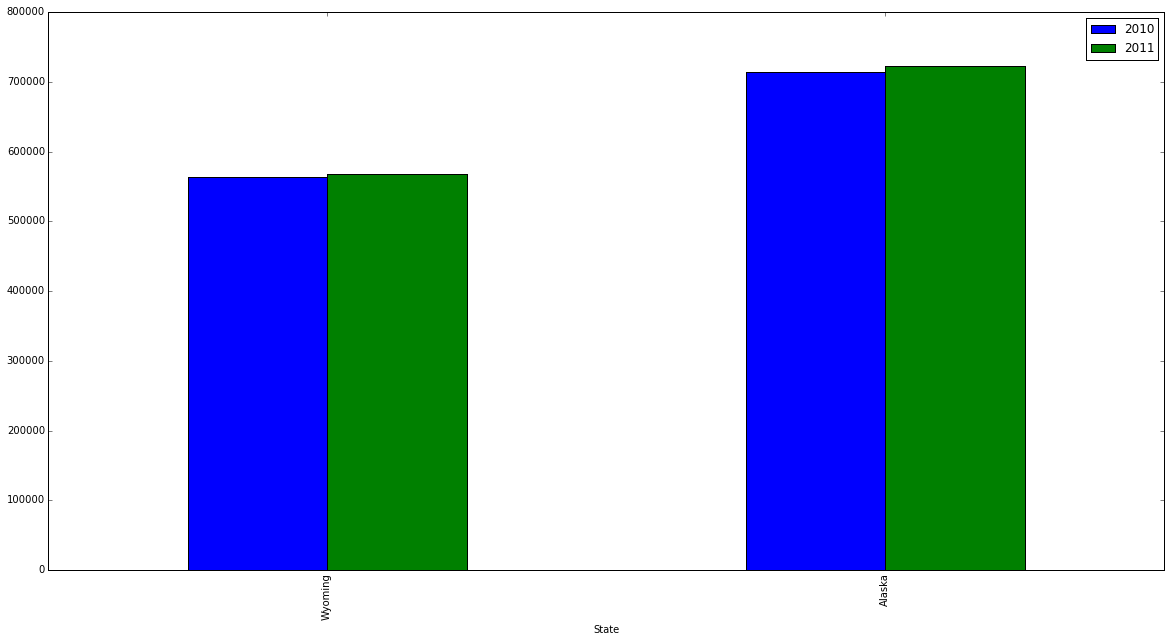

In [94]:
pop_data[["2010", "2011"]].loc[["Wyoming", "Alaska"]].plot(kind='bar', figsize=(20, 10))

In [82]:
pop_data[["2010"]].loc[["Alaska", "South Carolina"]]

,2010
State,
Alaska,713856
South Carolina,4636290


In [81]:
help(pop_data[["2010"]].loc)

Help on _LocIndexer in module pandas.core.indexing object:

class _LocIndexer(_LocationIndexer)
 |  Purely label-location based indexer for selection by label.
 |  
 |  ``.loc[]`` is primarily label based, but may also be used with a
 |  boolean array.
 |  
 |  Allowed inputs are:
 |  
 |  - A single label, e.g. ``5`` or ``'a'``, (note that ``5`` is
 |    interpreted as a *label* of the index, and **never** as an
 |    integer position along the index).
 |  - A list or array of labels, e.g. ``['a', 'b', 'c']``.
 |  - A slice object with labels, e.g. ``'a':'f'`` (note that contrary
 |    to usual python slices, **both** the start and the stop are included!).
 |  - A boolean array.
 |  
 |  ``.loc`` will raise a ``KeyError`` when the items are not found.
 |  
 |  See more at :ref:`Selection by Label <indexing.label>`
 |  
 |  Method resolution order:
 |      _LocIndexer
 |      _LocationIndexer
 |      _NDFrameIndexer
 |      builtins.object
 |  
 |  Methods inherited from _LocationIndex